In [29]:
import numpy as np

# J = np.load('MC50_N=10_1.npz')
J = np.load('MC50_N=10_2.npz')
print(np.shape(J))
print(J)

(10, 10)
[[0. 1. 0. 1. 1. 0. 1. 0. 0. 1.]
 [1. 0. 1. 1. 0. 1. 0. 0. 1. 1.]
 [0. 1. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 0. 1. 0. 0. 1. 0. 1.]
 [1. 0. 0. 1. 0. 1. 0. 1. 0. 1.]
 [0. 1. 0. 0. 1. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
 [0. 0. 0. 1. 1. 1. 1. 0. 1. 1.]
 [0. 1. 0. 0. 0. 0. 1. 1. 0. 1.]
 [1. 1. 0. 1. 1. 0. 0. 1. 1. 0.]]


In [30]:
import copy
def get_binary_list(num, length):
    """Intermediate helper function for brute_force()."""
    bit_string = "{0:b}".format(num)
    num_str_len = len(bit_string)
    num_list = np.zeros(length)
    if num == 0:
        return num_list
    filled_string = (length - num_str_len) * '0' + bit_string
    return list(map(int, filled_string))

Ising_list = []
def brute_force(J, h=None):             
    """Basic brute-force solver for confirming ground state energy of smaller Ising problems."""
    N = J.shape[0]
    if h is None:
        h = np.zeros(N)
    min_energy = 1e20
    for z in range(2**N):
        spins = np.array(get_binary_list(z, N))
        spins = 2 * (spins > 0) - 1
        ising_energy = -1/2*(J.dot(spins)).dot(spins) - h.dot(spins)
        Ising_list.append(ising_energy)

        if ising_energy < min_energy:
            min_energy = ising_energy
            opt_spins = copy.deepcopy(spins)
    return opt_spins, min_energy, Ising_list

In [31]:
spins_ground, E_ground, Ising_list = brute_force(J)

print("The spin configuration in the ground state is {}".format(spins_ground))
print("The ground energy is {}".format(E_ground))


The spin configuration in the ground state is [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
The ground energy is -23.0


For an N=10 spin system, the reported optimal spin configuration in the ground state is all spins aligned in the same direction (in this case, all spins are -1). This uniformity suggests strong **ferromagnetic** interactions within the system, where neighboring spins prefer to align in the same direction to minimize the system's energy.

In the Ising model, the energy of a configuration is determined by the interactions between spins (as defined by the J matrix). A negative energy value indicates that the interactions are predominantly attractive, leading to a stable configuration where spins align in the same direction. The more negative the energy, the more stable the system.

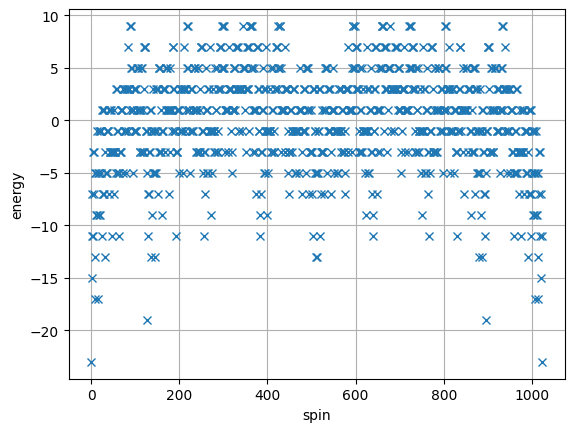

In [33]:
import matplotlib.pyplot as plt
spin = range(2**10)
plt.plot(spin, Ising_list, 'x')
plt.xlabel('spin')
plt.ylabel('energy')
plt.grid()
plt.show()